任务类型：基于sklearn中四种机器学习算法（KNN，SVM，决策树，随机森林），两种深度学习架构（resneXt50，VIT）的肺部X光二分类任务（是否为肺结核样本）

数据来源：https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/data

数据量：有标签的数据共4200张图片

训练设备：4090D（24GB）

具体分工如下：2人负责四种机器学习算法，4人负责两种深度学习架构模型

戴政：四种机器学习方法的预处理与评价函数

李宁：四种机器学习方法的构建和训练

陶四能：两种深度学习架构的预处理

张海峰：VIT模型的搭建和训练

林家苏：resneXt50模型的搭建和训练

许海天：两种深度学习架构的评价函数

In [1]:
import numpy  as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.image as mpimg  # Matplotlib库中的image模块，用于图像处理

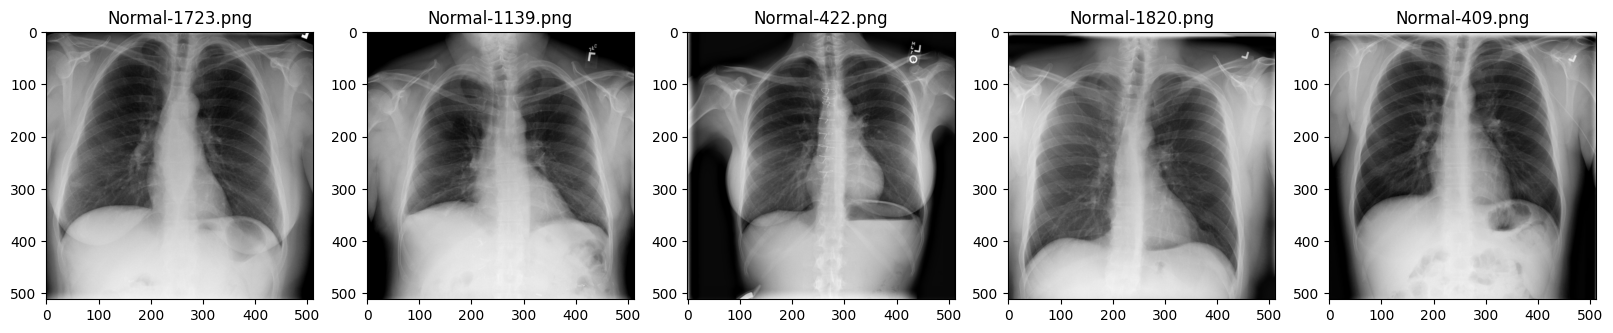

In [2]:
import random
plt.figure(figsize=(20,20))
folder=r'TB_Chest_Radiography_Database/Normal'
for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path= os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:

随机选择和显示部分肺结核胸部X光图像数据集中的样本，有助于检查和验证图像数据的质量和内容。

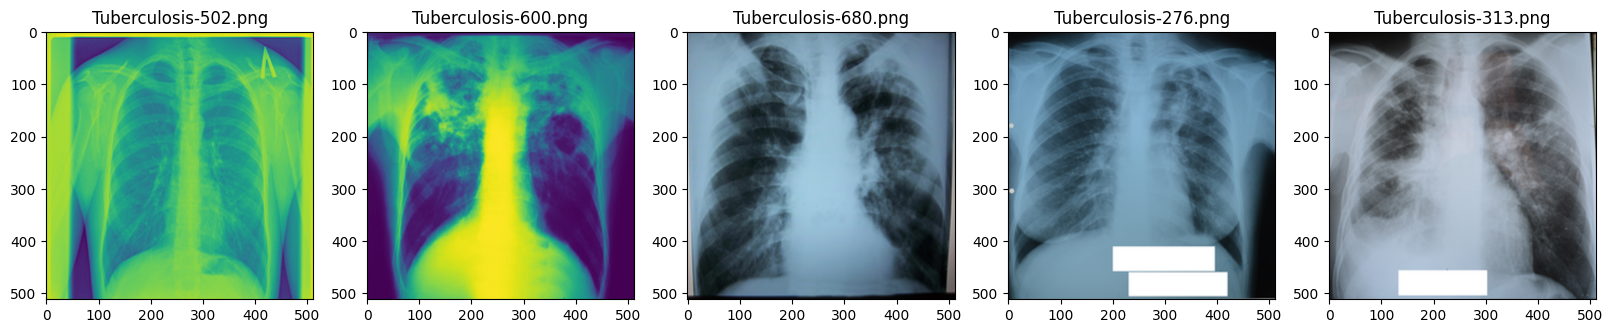

In [3]:
import random
plt.figure(figsize=(20,20))
folder=r'TB_Chest_Radiography_Database/Tuberculosis'
for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path= os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
Categories = ["Normal","Tuberculosis"]
flat_data_arr = []
target_arr = []
datadir = "TB_Chest_Radiography_Database/"

for category in Categories:
    print(f"正在加载类别：{category}")
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            img_array = imread(img_path, plugin='imageio')
            img_resized = resize(img_array, (150, 150, 3), anti_aliasing=True)
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))
        except Exception as e:
            print("")
    print(f"已加载类别 {category}")

flat_data_arr = np.array(flat_data_arr)
target_arr = np.array(target_arr)

print("所有类别图片已加载完成。")

正在加载类别：Normal

已加载类别 Normal
正在加载类别：Tuberculosis

已加载类别 Tuberculosis
所有类别图片已加载完成。


In [5]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df["Target"] = target
df.head()


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.894670,0.894670,0.894670,0.862856,0.862856,0.862856,0.833457,0.833457,0.833457,0.812704,...,0.253697,0.253697,0.253697,0.249964,0.249964,0.249964,0.286483,0.286483,0.286483,0
1,0.012408,0.012408,0.012408,0.012045,0.012045,0.012045,0.011765,0.011765,0.011765,0.011765,...,0.026039,0.026039,0.026039,0.028462,0.028462,0.028462,0.028807,0.028807,0.028807,0
2,0.855254,0.855254,0.855254,0.813576,0.813576,0.813576,0.777076,0.777076,0.777076,0.752351,...,0.018729,0.018729,0.018729,0.019435,0.019435,0.019435,0.022494,0.022494,0.022494,0
3,0.906582,0.906582,0.906582,0.868061,0.868061,0.868061,0.829729,0.829729,0.829729,0.799173,...,0.048969,0.048969,0.048969,0.109185,0.109185,0.109185,0.354183,0.354183,0.354183,0
4,0.039062,0.039062,0.039062,0.008060,0.008060,0.008060,0.004254,0.004254,0.004254,0.003922,...,0.271211,0.271211,0.271211,0.346850,0.346850,0.346850,0.485688,0.485688,0.485688,0


In [6]:
X = df.drop('Target',axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.894670,0.894670,0.894670,0.862856,0.862856,0.862856,0.833457,0.833457,0.833457,0.812704,...,0.299280,0.253697,0.253697,0.253697,0.249964,0.249964,0.249964,0.286483,0.286483,0.286483
1,0.012408,0.012408,0.012408,0.012045,0.012045,0.012045,0.011765,0.011765,0.011765,0.011765,...,0.025856,0.026039,0.026039,0.026039,0.028462,0.028462,0.028462,0.028807,0.028807,0.028807
2,0.855254,0.855254,0.855254,0.813576,0.813576,0.813576,0.777076,0.777076,0.777076,0.752351,...,0.030442,0.018729,0.018729,0.018729,0.019435,0.019435,0.019435,0.022494,0.022494,0.022494
3,0.906582,0.906582,0.906582,0.868061,0.868061,0.868061,0.829729,0.829729,0.829729,0.799173,...,0.047061,0.048969,0.048969,0.048969,0.109185,0.109185,0.109185,0.354183,0.354183,0.354183
4,0.039062,0.039062,0.039062,0.008060,0.008060,0.008060,0.004254,0.004254,0.004254,0.003922,...,0.240697,0.271211,0.271211,0.271211,0.346850,0.346850,0.346850,0.485688,0.485688,0.485688


In [7]:
Y = df[['Target']]
Y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn import svm
#导入支持向量机（Support Vector Machine，SVM）模型，用于分类任务。
from sklearn.neighbors import KNeighborsClassifier
#导入K最近邻（K-Nearest Neighbors，KNN）分类器，用于分类任务。
from sklearn.tree import DecisionTreeClassifier
#导入决策树（Decision Tree）分类器，用于分类任务。
from sklearn.ensemble import RandomForestClassifier
#：导入随机森林（Random Forest）分类器，用于分类任务。
from sklearn.model_selection import train_test_split
#导入用于将数据集拆分为训练集和测试集的函数 train_test_split。

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y)

In [10]:
X_train = X_train[:700]
y_train = y_train[:700]
X_test = X_test[:700]
y_test = y_test[:700]

In [11]:
svc = svm.SVC(probability=True)
svc.fit(X_train, y_train)
print(f"SUPPORT VECTOR MACHINE ACCURACY: {svc.score(X_test, y_test)}")

/root/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SUPPORT VECTOR MACHINE ACCURACY: 0.9685714285714285


In [12]:
svc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [13]:

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(f" KNN  ACCURACY ：{knn.score(X_test,y_test)}")

/root/miniconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 KNN  ACCURACY ：0.9428571428571428


In [14]:
knn.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(f" Decision Tree accuracy {dt.score(X_test,y_test)}")

 Decision Tree accuracy 0.8971428571428571


In [16]:
dt.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(f"Random Forest accuracy : {rf.score(X_test,y_test)}")

/root/miniconda3/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest accuracy : 0.96


In [18]:
rf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

评估测试结果

In [19]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

accuracy_svm, f1_svm = evaluate_model(svc, X_test, y_test)
accuracy_knn, f1_knn = evaluate_model(knn, X_test, y_test)
accuracy_dt, f1_dt = evaluate_model(dt, X_test, y_test)
accuracy_rf, f1_rf = evaluate_model(rf, X_test, y_test)

print("SVM Accuracy:", accuracy_svm)
print("SVM F1 Score:", f1_svm)
print("KNN Accuracy:", accuracy_knn)
print("KNN F1 Score:", f1_knn)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree F1 Score:", f1_dt)
print("Random Tree Accuracy:", accuracy_rf)
print("Random Tree F1 Score:", f1_rf)
print("四种机器学习算法的结果对比--李宁")

SVM Accuracy: 0.9685714285714285
SVM F1 Score: 0.968459134599853
KNN Accuracy: 0.9428571428571428
KNN F1 Score: 0.9405892764953168
Decision Tree Accuracy: 0.8971428571428571
Decision Tree F1 Score: 0.900397465437788
Random Tree Accuracy: 0.96
Random Tree F1 Score: 0.96
四种机器学习算法的结果对比--李宁


--------4种机器学习方法的混淆矩阵--戴政--------


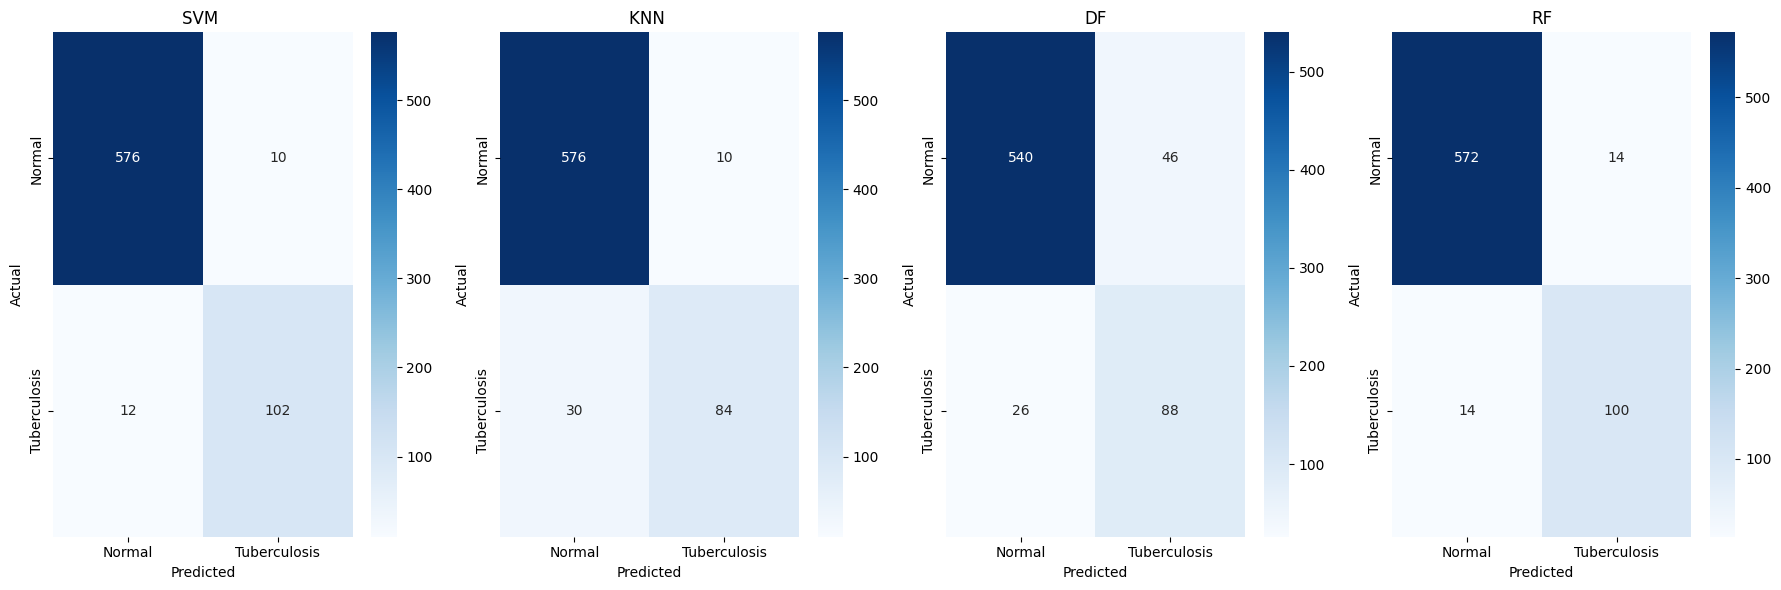

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions of all models
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred=rf.predict(X_test)

# Create a confusion matrix for each model
svc_cm = confusion_matrix(y_test, svc_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm=confusion_matrix(y_test, rf_pred)

# Plot confusion matrices
plt.figure(figsize=(18, 6))
print("--------4种机器学习方法的混淆矩阵--戴政--------")
plt.subplot(1, 4, 1)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=Categories, yticklabels=Categories)
plt.title('SVM ')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 2)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=Categories, yticklabels=Categories)
plt.title('KNN ')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 3)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=Categories, yticklabels=Categories)
plt.title('DF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 4)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=Categories, yticklabels=Categories)
plt.title('RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

----不同机器学习算法的roc对比图--戴政----


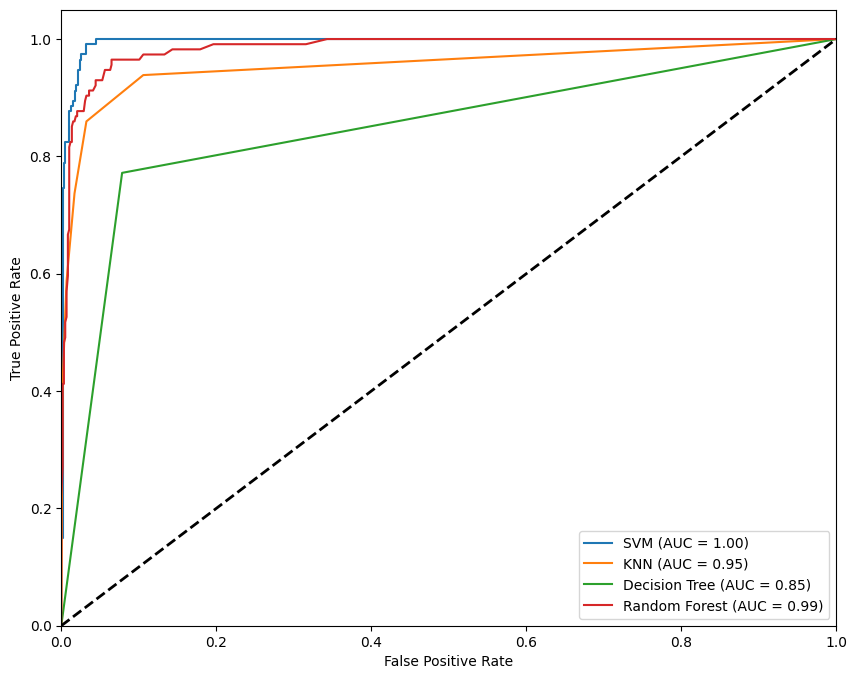

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 为SVM获取预测概率
svc_probs = svc.predict_proba(X_test)[:, 1]

# 为KNN获取预测概率
knn_probs = knn.predict_proba(X_test)[:, 1]

# 决策树和随机森林通常返回概率，所以可以直接使用predict_proba
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# 计算ROC曲线的FPR和TPR
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# 计算AUC
svc_auc = auc(svc_fpr, svc_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
print('----不同机器学习算法的roc对比图--戴政----')
# 绘制ROC曲线
plt.figure(figsize=(10, 8))

plt.plot(svc_fpr, svc_tpr, label=f'SVM (AUC = {svc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# 绘制随机分类器的ROC曲线
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

--------戴政部分2结束------

--------陶四能部分开始------

In [22]:
import torch  # PyTorch库，用于深度学习的构建和训练
import numpy as np  # NumPy库，用于数组和矩阵运算，提供了高效的数值计算工具
from pathlib import Path  # Pathlib库，用于处理文件和目录路径
import cv2  # OpenCV库，用于计算机视觉任务，如图像处理和视频处理
import math  # 数学库，提供基础的数学函数和常量
import pandas as pd  # Pandas库，用于数据分析和数据处理
from skimage.transform import resize  # Scikit-Image库中的resize函数，用于图像缩放
from skimage.io import imread  # Scikit-Image库中的imread函数，用于读取图像文件
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report  # Scikit-Learn库，用于计算评价指标和可视化混淆矩阵
from collections.abc import Iterable  # Collections模块中的Iterable类，用于检查对象是否为可迭代对象
import matplotlib.pyplot as plt  # Matplotlib库中的pyplot模块，用于数据可视化
import os  # OS模块，用于操作系统相关功能，如文件和目录操作
import timm  # PyTorch Image Models库，提供了大量预训练的视觉模型
import torchvision  # Torchvision库，提供了用于计算机视觉的工具和预训练模型

In [23]:
# 定义批量大小为30
batch_size = 30
# 定义图像块的大小为16
patch_size = 16
# 定义输入图像的大小为224
img_size = 224
# 计算图像中块的数量（224x224的图像分成16x16的块）
num_patches = (img_size // patch_size) ** 2
# 定义位置嵌入的维度为768
p_dim = 768
# 定义自注意力头的数量为12
heads_att = 12
# 定义编码器的数量为12
num_encoder = 12

数据处理阶段
读取图像文件：使用 glob 方法从指定目录（"TB_Chest_Radiography_Database/Normal/" 和 "TB_Chest_Radiography_Database/Tuberculosis/"）中读取所有 PNG 格式的图像文件，并将这些文件路径转换为字符串格式存储。
排序图像文件：通过 sorted() 函数对读取到的图像路径进行排序，确保数据的顺序一致，这对后续数据处理和模型训练的稳定性很重要。
创建标签：为每个图像分配一个标签。对于正常的X光图像（Normal_images），分配标签 0；对于结核病的X光图像（TB_images），分配标签 1。这样做是为了在后续的机器学习模型中使用这些标签来训练识别正常和结核病图像的分类器。

In [24]:
target_class={0:"Normal",1:"Tuberculosis"}
Normal_dir=Path("TB_Chest_Radiography_Database/Normal/")
TB_dir=Path("TB_Chest_Radiography_Database/Tuberculosis/")

In [25]:
Normal_images:list=sorted(list(map(str, list(Normal_dir.glob("*.png")))))
TB_images:list=sorted(list(map(str, list(TB_dir.glob("*.png")))))
Normal_labels:list=[0]*len(Normal_images)
TB_labels:list=[1]*len(TB_images)

In [26]:
images=np.array(Normal_images+TB_images)
labels=np.array(Normal_labels+TB_labels)
images.shape, labels.shape

((4200,), (4200,))

In [27]:
# 导入train_test_split函数，用于划分数据集
from sklearn.model_selection import train_test_split
# 第一次划分：将数据集分成训练集(80%)和临时验证集(20%)
x_train, x_valid, y_train, y_valid = train_test_split(images,labels,test_size=0.2,random_state=42)
# 第二次划分：将临时验证集分成最终验证集(10%)和测试集(10%)
x_valid,x_test,y_valid,y_test=train_test_split(x_valid,y_valid,test_size=0.5,random_state=42)

(x_train.shape,x_valid.shape,x_test.shape)

((3360,), (420,), (420,))

训练集 (x_train): 3360 个样本，用于训练模型。
验证集 (x_valid): 420 个样本，用于训练期间的模型性能评估和参数调优
测试集 (x_test): 420 个样本，用于最终模型性能评
结果表明数据集已经按预期比例正确划分，每个子集的样本数与预期相符。

定义函数对输入的图像进行预处理，包括灰度转换、对比度增强、模糊处理、调整大小和颜色空间转换，并最终将图像的通道顺序调整为深度学习模型所需的格式
其中利用自适应直方图均衡化 (CLAHE) 增强局部对比度，突出图像细节，防止过度增强；利用高斯模糊平滑图像，减少噪声和细节。
将两者结合，改善图像质量，使后续处理和分析更有效。

In [28]:
def image_preprocessing(path):
    img=cv2.imread(path)
     # 将图像转换为灰度图像
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # 创建自适应直方图均衡化对象，clipLimit为对比度限制
    clahe=cv2.createCLAHE(clipLimit=2)
    # 应用自适应直方图均衡化
    img=clahe.apply(img)
    # 使用高斯模糊处理图像，内核大小为5x5
    img=cv2.GaussianBlur(img,(5,5),0,borderType=cv2.BORDER_CONSTANT)
    # 调整图像大小
    img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_LINEAR)
    # 将图像从灰度转换为RGB图像
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    # 将图像的轴从 (height, width, channels) 转换为 (channels, height, width)
    img=np.moveaxis(img,-1,0)
    return img

对训练集、验证集和测试集中的所有图像进行预处理，并将它们转换为浮点型数组
使用 map 函数对练集、验证集和测试集中的每个元素（图像路径）应用 image_preprocessing 函数，
将处理后的图像列表转换为 NumPy 数组。
使用 astype(np.float32) 将数组的数据类型转换为 32 位浮点型，以提高计算精度和兼容性。

In [29]:
x_train=np.array(list(map(image_preprocessing,x_train))).astype(np.float32)
x_valid=np.array(list(map(image_preprocessing,x_valid))).astype(np.float32)
x_test=np.array(list(map(image_preprocessing,x_test))).astype(np.float32)
x_train.shape,x_valid.shape,x_test.shape

((3360, 3, 224, 224), (420, 3, 224, 224), (420, 3, 224, 224))

将预处理后的图像数据和标签转换为 PyTorch 张量，并移动到指定的设备（CPU 或 GPU）上，以便进行后续的模型训练和评估

In [30]:
device=("cuda" if torch.cuda.is_available() else "cpu")
x_train=torch.from_numpy(x_train).to(device)
x_valid=torch.from_numpy(x_valid).to(device)
x_test=torch.from_numpy(x_test).to(device)
y_train=torch.from_numpy(y_train).to(device)
y_valid=torch.from_numpy(y_valid).to(device)
y_test=torch.from_numpy(y_test).to(device)

定义一个标准化处理类StandardScaler，用于对 PyTorch 张量进行标准化操作

In [31]:
class StandardScaler():
    def __init__(self) -> None:
        # 初始化均值和标准差
        self.mean = None
        self.std = None

    def fit(self, tensor: torch.Tensor) -> None:
        # 计算并存储张量的均值和标准差
        self.mean = tensor.mean((0, 2, 3), keepdim=True)
        self.std = tensor.std((0, 2, 3), keepdim=True)

    def transform(self, tensor: torch.Tensor) -> torch.Tensor:
        # 使用计算得出的均值和标准差对张量进行标准化
        scaled = (tensor - self.mean) / (self.std + 1e-5)
        return scaled

    def fit_transform(self, tensor: torch.Tensor) -> torch.Tensor:
        # 计算均值和标准差，并对张量进行标准化
        self.fit(tensor=tensor)
        scaled = self.transform(tensor=tensor)
        return scaled

接着使用StandardScaler类对训练集、验证集和测试集的图像数据进行标准化处理

In [32]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_valid=scaler.transform(x_valid)

从 torch.utils.data 模块导入 TensorDataset 和 DataLoader 两个类，以便将预处理后的数据集转换为 PyTorch 的数据集对象，并创建数据加载器以便于批量处理数据。
TensorDataset 是一个将张量数据包装成数据集对象的类，可以将输入数据和标签打包在一起，便于数据加载和迭代。
使用 TensorDataset 可以方便地将图像数据和标签结合起来，创建一个可迭代的数据集对象。
DataLoader 是一个用于批量加载数据的类，可以从数据集对象中按批次加载数据，并提供对数据的随机访问、打乱和并行加载等功能。
使用 DataLoader 可以方便地将数据集分成多个小批次，在训练过程中按批次加载数据，提高训练效率。

In [33]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [34]:
# 将训练集、验证集和测试集的图像数据和标签封装成 TensorDataset 对象
train_dataset=TensorDataset(x_train,y_train)
val_dataset=TensorDataset(x_valid,y_valid)
test_dataset=TensorDataset(x_test,y_test)
# 创建训练集、验证集和测试集的数据加载器，设置批量大小和是否打乱数据
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=False)
val_loader=DataLoader(val_dataset,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

------陶四能部分结束------

-------林家苏部分开始------

resnext50_32x4d 是 ResNeXt 网络架构的一种变体。ResNeXt 是一种卷积神经网络（CNN）架构，由 Facebook 的研究团队提出，它结合了 ResNet 和 Inception 模型的优点。

In [35]:
base = torchvision.models.resnext50_32x4d(num_classes=1)

定义了一个自定义神经网络模型类 ResNext，继承自 torch.nn.Module。该模型在预训练的 base 模型基础上增加了一个 sigmoid 激活函数层，用于将模型输出转化为概率值

In [36]:
class ResNext(torch.nn.Module):
    def __init__(self, base):
        super().__init__()
        self.base=base
        self.sigmoid=torch.nn.Sigmoid()
    def forward(self,x):
        return self.sigmoid(self.base(x))

In [37]:
model=ResNext(base).to(device)
print(model)  # 打印模型结构。

ResNext(
  (base): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

resnext50模型的结构--林家苏

In [38]:
total_params = sum(p.numel() for p in model.parameters())
total_params

22981953

模型的参数量为22981953

设置了训练模型的超参数和优化策略，包括训练的轮数、损失函数、优化器以及学习率调度器。它们将用于控制模型在训练过程中的行为。
余弦退火学习率调度器会在训练过程中逐步调整学习率，以提高训练效果和模型性能。

In [39]:
epoch=100
loss_fn=torch.nn.BCELoss()
opt=torch.optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)
scheduler=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=opt,T_max=epoch,verbose=True)

Adjusting learning rate of group 0 to 1.0000e-03.


In [40]:
best_loss = float('inf')  # 初始化最优损失为正无穷
best_model_weights = None  # 初始化最优模型权重
patience = 10  # 早停策略的耐心值
train_losses = []  # 用于存储每个epoch的训练损失
val_losses = []  # 用于存储每个epoch的验证损失

for i in range(epoch):
    print(f"Epoch: {i+1}\n")
    model.train()  # 设置模型为训练模式
    train_loss = 0  # 初始化训练损失
    train_batches = len(train_loader)  # 获取训练批次数量
    
    # 训练循环
    for batch, (x, y) in enumerate(train_loader):
        pred = model(x).squeeze(-1)  # 模型预测
        loss = loss_fn(pred, y.float())  # 计算损失
        train_loss += loss.item()  # 累积损失
        loss.backward()  # 反向传播
        opt.step()  # 更新参数
        opt.zero_grad()  # 清空梯度
    
    train_loss /= train_batches  # 计算平均训练损失
    train_losses.append(train_loss)  # 记录训练损失
    print(f" \n train loss: {train_loss:>8f} \n")
    
    model.eval()  # 设置模型为评估模式
    val_loss = 0  
    val_batches = len(val_loader)  # 获取验证批次数量
    
    # 验证循环
    with torch.no_grad():
        for x, y in val_loader:
            pred = model(x).squeeze(-1)  # 模型预测
            val_loss += loss_fn(pred, y.float()).item()  # 累积损失
    
    val_loss /= val_batches  # 计算平均验证损失
    val_losses.append(val_loss)  # 记录验证损失
    print(f" \n test loss: {val_loss:>8f} \n")
    
    # 检查是否为最优模型
    if val_loss < best_loss:
        best_loss = val_loss  # 更新最优损失
        best_model_weights = model.state_dict()  # 更新最优模型权重
        patience = 10  #重置
    else:
        patience -= 1  
        if patience == 0:  # 停止训练
            break
    
    scheduler.step()  # 更新学习率

# 加载最优模型权重
model.load_state_dict(best_model_weights)
print(f'best loss:', best_loss)
print("ResNeXt训练结束--林家苏")

Epoch: 1

 
 train loss: 0.484484 

 
 test loss: 0.345259 

Adjusting learning rate of group 0 to 9.9975e-04.
Epoch: 2

 
 train loss: 0.353446 

 
 test loss: 0.301532 

Adjusting learning rate of group 0 to 9.9901e-04.
Epoch: 3

 
 train loss: 0.316408 

 
 test loss: 0.307312 

Adjusting learning rate of group 0 to 9.9778e-04.
Epoch: 4

 
 train loss: 0.262471 

 
 test loss: 0.272018 

Adjusting learning rate of group 0 to 9.9606e-04.
Epoch: 5

 
 train loss: 0.196444 

 
 test loss: 0.241377 

Adjusting learning rate of group 0 to 9.9384e-04.
Epoch: 6

 
 train loss: 0.157015 

 
 test loss: 0.130119 

Adjusting learning rate of group 0 to 9.9114e-04.
Epoch: 7

 
 train loss: 0.137801 

 
 test loss: 0.121255 

Adjusting learning rate of group 0 to 9.8796e-04.
Epoch: 8

 
 train loss: 0.118320 

 
 test loss: 0.375004 

Adjusting learning rate of group 0 to 9.8429e-04.
Epoch: 9

 
 train loss: 0.098517 

 
 test loss: 0.131954 

Adjusting learning rate of group 0 to 9.8015e-04.
E

-----林家苏部分结束-------

-----许海天部分1开始------

---ResneXt损失曲线--许海天---


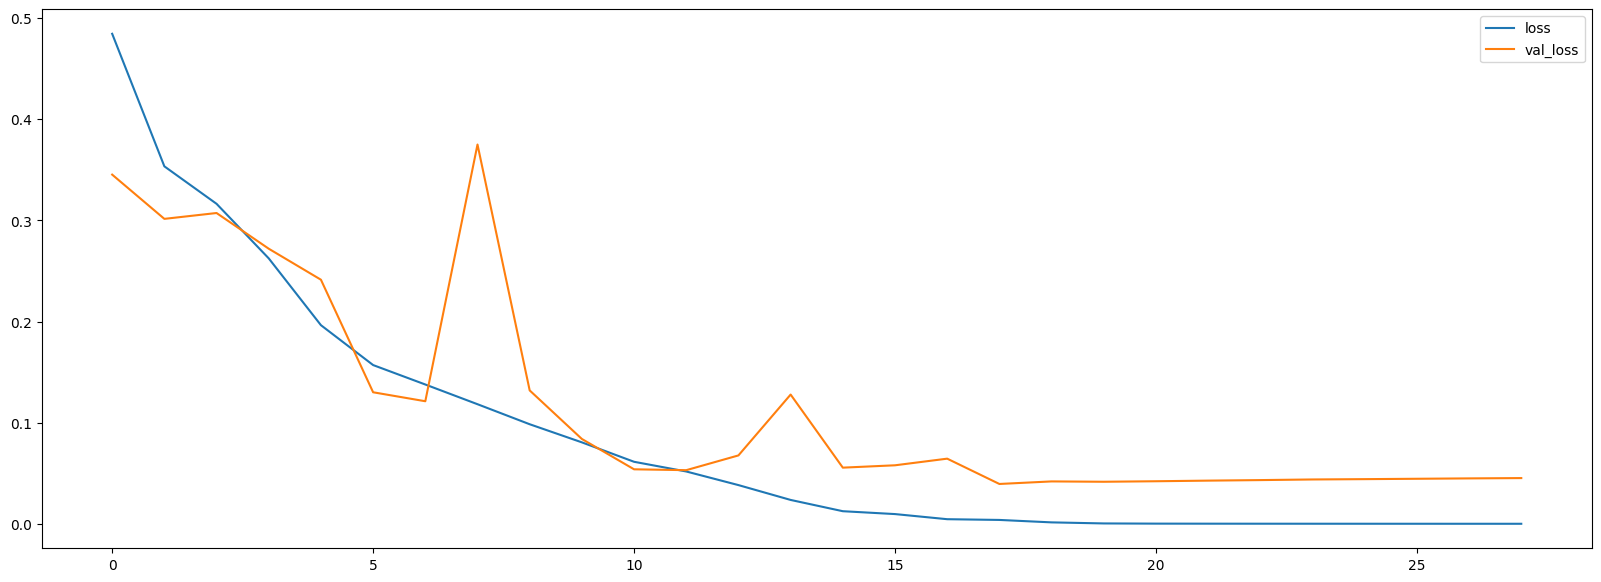

In [41]:
# 设置图形大小，宽度为 20 英寸，高度为 7 英寸
plt.figure(figsize=(20, 7))
# 绘制训练损失曲线
# x 轴为训练的 epoch 数，y 轴为训练损失
print("---ResneXt损失曲线--许海天---")
plt.plot(range(len(train_losses)), train_losses)
# 绘制验证损失曲线
# x 轴为训练的 epoch 数，y 轴为验证损失
plt.plot(range(len(val_losses)), val_losses)
# 添加图例，分别标记训练损失和验证损失曲线
plt.legend(['loss', 'val_loss'], loc='upper right')
# 显示绘制的图形
plt.show()


In [42]:
model.eval()
val_preds=[]
with torch.no_grad():
    for x,y in val_loader:
        pred=model(x).squeeze(-1)
        val_preds.append(pred.cpu().numpy())
val_preds=np.concatenate(val_preds,axis=0)    
val_preds=np.round(val_preds)
recall_score(y_valid.cpu().numpy(),val_preds),accuracy_score(y_valid.cpu().numpy(),val_preds)

(0.9295774647887324, 0.9880952380952381)

In [43]:
model.eval()
# 初始化存储测试集预测结果的列表
test_preds = []
# 禁用梯度计算，以减少内存消耗和计算开销
with torch.no_grad():
    # 遍历测试集数据加载器，生成预测结果
    for x, y in test_loader:
        # 模型预测，并去掉最后一个维度
        pred = model(x).squeeze(-1)
        # 将预测结果从 GPU 移动到 CPU，并转换为 numpy 数组
        test_preds.append(pred.cpu().numpy())
# 将所有批次的预测结果拼接成一个数组
test_preds = np.concatenate(test_preds, axis=0)
# 将预测结果进行四舍五入，得到二分类结果（0 或 1）
test_preds = np.round(test_preds)
#计算召回率和准确率
recall_score(y_test.cpu().numpy(),test_preds),accuracy_score(y_test.cpu().numpy(),test_preds)

(0.9090909090909091, 0.9833333333333333)

计算测试结果函数

In [44]:
def evaluation_parametrics(name,y_val, y_pred):
    print("\n{}\n".format(name))  
    print(classification_report(y_val, y_pred)) 

画混淆矩阵的函数

In [45]:
def eva_ConfusionMatrixDisplay(name,y_val, y_pred):
    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\n{}\n".format(name))
    t1.plot()

In [46]:
evaluation_parametrics("ResneXt50 训练集结果--许海天", y_valid.cpu().numpy(), val_preds)
evaluation_parametrics("ResneXt50 测试集结果--许海天", y_test.cpu().numpy(), test_preds)


ResneXt50 训练集结果--许海天

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       349
           1       1.00      0.93      0.96        71

    accuracy                           0.99       420
   macro avg       0.99      0.96      0.98       420
weighted avg       0.99      0.99      0.99       420


ResneXt50 测试集结果--许海天

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       354
           1       0.98      0.91      0.94        66

    accuracy                           0.98       420
   macro avg       0.98      0.95      0.97       420
weighted avg       0.98      0.98      0.98       420




ResNeXt50 训练集混淆矩阵--许海天



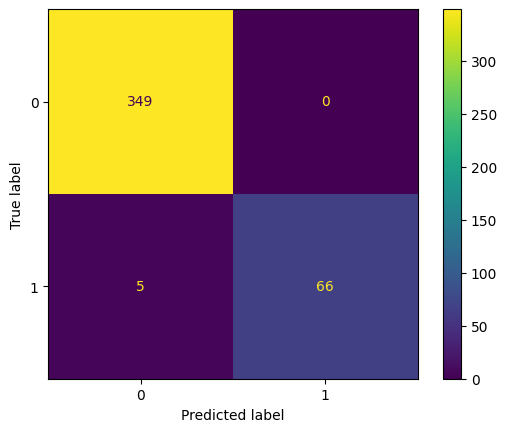

In [47]:
eva_ConfusionMatrixDisplay("ResNeXt50 训练集混淆矩阵--许海天", y_valid.cpu().numpy(), val_preds)


ResNeXt50 测试集混淆矩阵--许海天



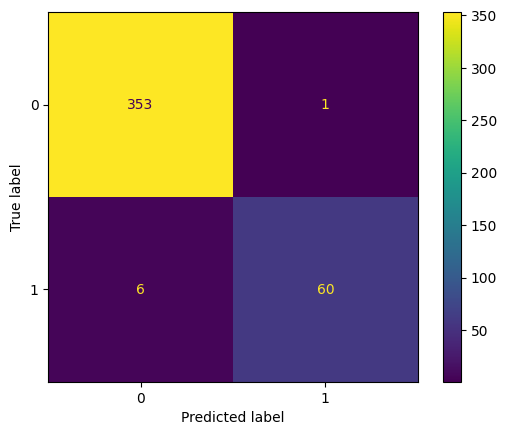

In [48]:
eva_ConfusionMatrixDisplay("ResNeXt50 测试集混淆矩阵--许海天", y_test.cpu().numpy(), test_preds)

----ResNeXt roc曲线---许海天----


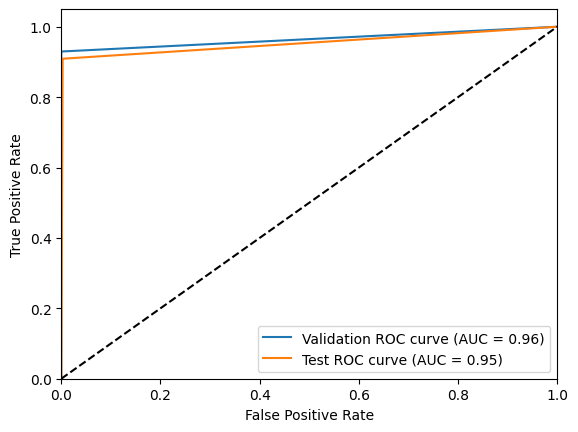

In [49]:
from sklearn.metrics import roc_curve, auc
# 计算ROC曲线的FPR和TPR
fpr_val, tpr_val, _ = roc_curve(y_valid.cpu().numpy(), val_preds)
fpr_test, tpr_test, _ = roc_curve(y_test.cpu().numpy(), test_preds)

# 计算AUC
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 随机分类器的ROC曲线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('----ResNeXt roc曲线---许海天----')
plt.legend(loc="lower right")
plt.show()

-----许海天部分1结束-------

------张海峰部分开始-------

VIT部分

In [50]:
def extract_image_patches(x: torch.Tensor, kernel: int, stride: int = 1, dilation: int = 1):
    # 获取输入张量的形状
    b, c, h, w = x.shape
    # 计算输出张量的高度和宽度
    h2 = math.ceil(h / stride)
    w2 = math.ceil(w / stride)
    # 计算需要填充的行和列
    pad_row = (h2 - 1) * stride + (kernel - 1) * dilation + 1 - h
    pad_col = (w2 - 1) * stride + (kernel - 1) * dilation + 1 - w
    # 填充输入张量
    x = torch.nn.functional.pad(x, (pad_row // 2, pad_row - pad_row // 2, pad_col // 2, pad_col - pad_col // 2))
    
    # 提取图像块
    patches = x.unfold(2, kernel, stride).unfold(3, kernel, stride)
    # 调整张量维度顺序并展平图像块
    patches = patches.permute(0, 2, 3, 1, 4, 5).contiguous()
    patches = patches.view(*patches.size()[:3], -1)
    
    # 返回展平后的图像块
    return patches.view(b, -1, patches.shape[-1])

定义get_positional_embeddings为用于生成位置嵌入的函数。
通过使用正弦和余弦函数，这些嵌入向量在不同维度上具有不同的频率，使模型能够更好地捕捉序列中的顺序关系。

In [51]:
def get_positional_embeddings(sequence_length: int, d: int):
    # 初始化结果张量，大小为 (sequence_length, d)，初始值为 1
    result = torch.ones(sequence_length, d)
    
    # 遍历序列长度和维度，计算位置嵌入
    for i in range(sequence_length):
        for j in range(d):
            # 计算位置嵌入
            result[i][j] = (
                np.sin(i / (10000 ** (j / d)))
                if j % 2 == 0
                else np.cos(i / (10000 ** ((j - 1) / d)))
            )
    return result

定义一个编码器块类，用于实现 Transformer 模型中的一个编码器层

In [52]:
class EncoderBlock(torch.nn.Module):
    def __init__(self, projection_dim: int, num_heads: int, num_patches: int):
        super().__init__()
        # 初始化参数
        self.projection_dim = projection_dim
        self.num_heads = num_heads
        self.num_patches = num_patches
        # 定义层归一化层
        self.norm1 = torch.nn.LayerNorm(self.projection_dim)
        self.norm2 = torch.nn.LayerNorm(self.projection_dim)
        # 定义多头注意力层
        self.attention = torch.nn.MultiheadAttention(self.projection_dim, self.num_heads, batch_first=True)
        # 定义多层感知机（MLP）
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(self.projection_dim, self.projection_dim * 4),
            torch.nn.GELU(),
            torch.nn.Linear(self.projection_dim * 4, self.projection_dim),
        )
    def forward(self, x):
        # 层归一化和多头注意力机制
        x1 = self.norm1(x)
        attention = self.attention(x1, x1, x1)[0]
        x2 = attention + x
        # 第二次层归一化和MLP
        x3 = self.norm2(x2)
        x3 = self.mlp(x3)
        # 残差连接
        out = x2 + x3
        return out

定义一个视觉变换器（ViT）模型类，用于图像分类任务

In [53]:
class ViT(torch.nn.Module):
    def __init__(self, patch_size: int, num_patches: int, projection_dim: int, num_heads: int, num_encoder: int):
        super().__init__()
        # 初始化参数
        self.patch_size = patch_size
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.num_heads = num_heads
        self.num_encoder = num_encoder
        # 计算输入维度（每个图像块的大小）
        self.input_d = self.patch_size * self.patch_size * 3
        # 定义线性层，将输入图像块投影到指定的维度
        self.linear = torch.nn.Linear(self.input_d, self.projection_dim)
        # 定义位置嵌入
        self.embbeding = torch.nn.Parameter(
            get_positional_embeddings(self.num_patches, self.projection_dim)
        )
        self.embbeding.requires_grad = False
        # 定义一系列编码器块
        self.blocks = torch.nn.ModuleList([
            EncoderBlock(self.projection_dim, self.num_heads, self.num_patches) for _ in range(self.num_encoder)
        ])
        # 定义层归一化层
        self.ln_out = torch.nn.LayerNorm(self.projection_dim)
        # 定义输出层
        self.out = torch.nn.Sequential(
            torch.nn.Linear(self.projection_dim, 1),
            torch.nn.Sigmoid()
        )
    def forward(self, images: torch.Tensor):
        batch_size = images.size()[0]
        # 提取图像块
        x = extract_image_patches(images, self.patch_size, self.patch_size)
        # 投影图像块到指定的维度
        x = self.linear(x)
        # 添加位置嵌入
        pos_embed = self.embbeding.repeat(batch_size, 1, 1)
        encoded = x + pos_embed
        # 通过编码器块
        for block in self.blocks:
            encoded = block(encoded)
        # 平均池化
        rep = encoded.mean(dim=1)
        rep = self.ln_out(rep)
        # 通过输出层
        output = self.out(rep)
        return output

In [54]:
model=ViT(patch_size=patch_size,
          num_patches=num_patches,
          projection_dim=p_dim,
          num_heads=heads_att,
          num_encoder=num_encoder).to(device)
print(model)

ViT(
  (linear): Linear(in_features=768, out_features=768, bias=True)
  (blocks): ModuleList(
    (0-11): 12 x EncoderBlock(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (mlp): Sequential(
        (0): Linear(in_features=768, out_features=3072, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=3072, out_features=768, bias=True)
      )
    )
  )
  (ln_out): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (out): Sequential(
    (0): Linear(in_features=768, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


VIT模型结构--张海峰


In [55]:
vit_total_params = sum(p.numel() for p in model.parameters())
vit_total_params

85797889

通过计算和分析 ViT 模型的参数总数，我们可以评估模型的复杂性和计算资源需求。
ViT 模型的总参数数目为 85,797,889，表明该模型在处理和训练过程中需要大量计算资源

设置了训练模型的超参数和优化策略，包括训练的轮数、损失函数、优化器以及学习率调度器。它们将用于控制模型在训练过程中的行为。
余弦退火学习率调度器会在训练过程中逐步调整学习率，以提高训练效果和模型性能。

In [56]:
epoch=100
loss_fn=torch.nn.BCELoss()
opt=torch.optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)
scheduler=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=opt,T_max=epoch,verbose=True)

Adjusting learning rate of group 0 to 1.0000e-03.


训练一个深度学习模型，并在训练过程中监控验证损失，使用早停机制来防止过度训练。
代码包含了训练和验证两个阶段，并使用学习率调度器来动态调整学习率。

In [65]:
# 初始化变量
best_loss = float('inf')  # 设置最佳损失初始值为无穷大
best_model_weights = None  # 用于存储最佳模型的权重
patience = 10  # 耐心值，当验证损失不再改善时提前停止训练
train_losses = []  # 记录每个epoch的训练损失
val_losses = []  # 记录每个epoch的验证损失
for i in range(epoch):  # 迭代训练
    print(f"Epoch: {i + 1}\n")
    # 训练阶段
    model.train()  # 设置模型为训练模式
    train_loss = 0  # 初始化训练损失
    train_batches = len(train_loader)  # 获取训练数据的批次数
    for batch, (x, y) in enumerate(train_loader):  # 遍历每个训练批次
        pred = model(x).squeeze(-1)  # 进行预测，并去掉最后一个维度
        loss = loss_fn(pred, y.float())  # 计算损失
        train_loss += loss.item()  # 累积损失
        loss.backward()  # 反向传播计算梯度
        opt.step()  # 更新模型参数
        opt.zero_grad()  # 清空梯度
    train_loss /= train_batches  # 计算平均训练损失
    train_losses.append(train_loss)  # 记录训练损失
    print(f" \n train loss: {train_loss:.8f} \n")
    # 验证阶段
    model.eval()  # 设置模型为评估模式
    val_loss = 0  # 初始化验证损失
    val_batches = len(val_loader)  # 获取验证数据的批次数
    with torch.no_grad():  # 禁用梯度计算
        for x, y in val_loader:  # 遍历每个验证批次
            pred = model(x).squeeze(-1)  # 进行预测，并去掉最后一个维度
            val_loss += loss_fn(pred, y.float()).item()  # 累积损失
    val_loss /= val_batches  # 计算平均验证损失
    val_losses.append(val_loss)  # 记录验证损失
    print(f"\n test loss: {val_loss:.8f} \n")
    # 检查验证损失是否改善
    if val_loss < best_loss:
        best_loss = val_loss  # 更新最佳损失
        best_model_weights = model.state_dict()  # 保存最佳模型的权重
        patience = 10  # 重置耐心值
    else:
        patience -= 1  # 耐心值减1
        if patience == 0:  # 当耐心值为0时，停止训练
            print("Early stopping triggered")
            break
    # 学习率调度器更新
    scheduler.step()
# 加载验证损失最小的模型权重
model.load_state_dict(best_model_weights)
print(f'Best validation loss: {best_loss:.8f}')
print("VIT模型训练结束--张海峰")

Epoch: 1

 
 train loss: 0.03057989 


 test loss: 0.08911600 

Adjusting learning rate of group 0 to 8.0645e-04.
Epoch: 2

 
 train loss: 0.02308702 


 test loss: 0.07905997 

Adjusting learning rate of group 0 to 7.9389e-04.
Epoch: 3

 
 train loss: 0.03641480 


 test loss: 0.08654280 

Adjusting learning rate of group 0 to 7.8104e-04.
Epoch: 4

 
 train loss: 0.03033613 


 test loss: 0.07876724 

Adjusting learning rate of group 0 to 7.6791e-04.
Epoch: 5

 
 train loss: 0.02371979 


 test loss: 0.05408916 

Adjusting learning rate of group 0 to 7.5452e-04.
Epoch: 6

 
 train loss: 0.01415428 


 test loss: 0.05504686 

Adjusting learning rate of group 0 to 7.4088e-04.
Epoch: 7

 
 train loss: 0.01307082 


 test loss: 0.05809031 

Adjusting learning rate of group 0 to 7.2700e-04.
Epoch: 8

 
 train loss: 0.01124760 


 test loss: 0.05452204 

Adjusting learning rate of group 0 to 7.1289e-04.
Epoch: 9

 
 train loss: 0.00901351 


 test loss: 0.05429870 

Adjusting learning rate 

通过 Matplotlib 库绘制训练损失和验证损失的曲线图，以可视化的方式展示模型训练过程中损失的变化趋势

-------张海峰部分结束----------

-------许海天部分2开始---------

---VIT训练损失曲线--许海天---


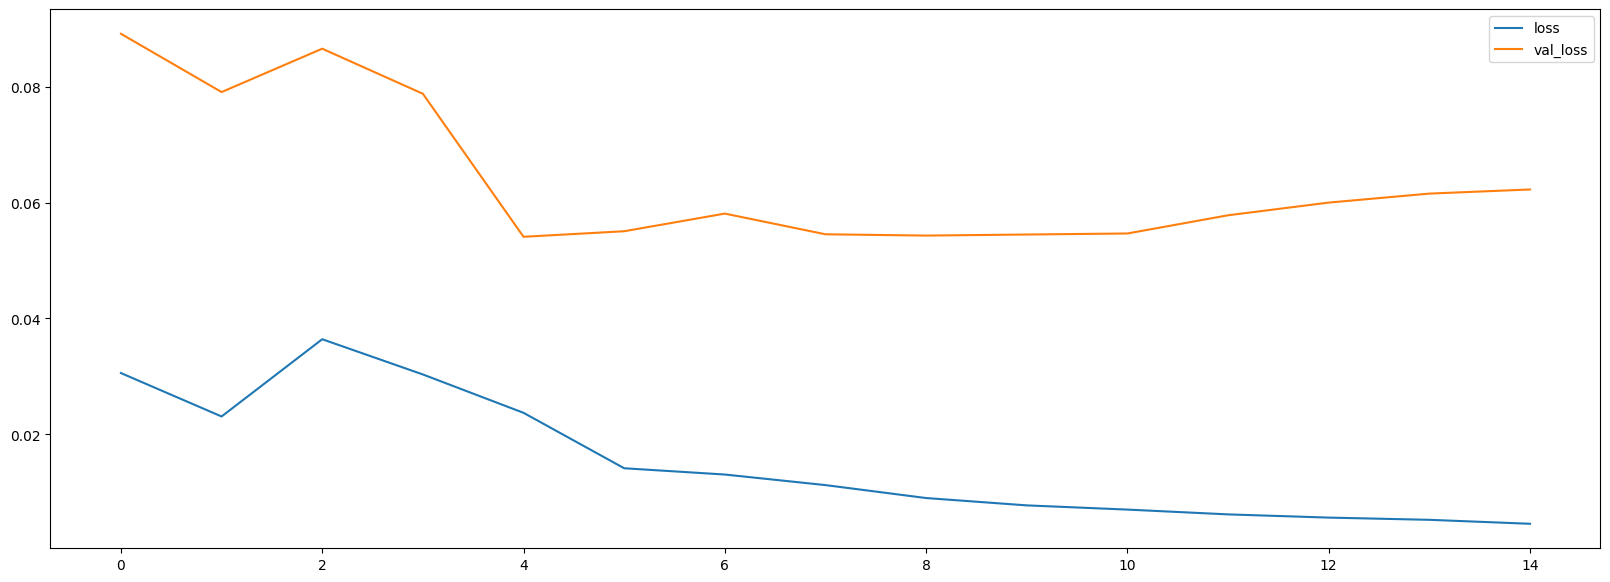

In [66]:
# 设置图形大小，宽度为 20 英寸，高度为 7 英寸
plt.figure(figsize=(20, 7))
# 绘制训练损失曲线
# x 轴为训练的 epoch 数，y 轴为训练损失
print("---VIT训练损失曲线--许海天---")
plt.plot(range(len(train_losses)), train_losses)
# 绘制验证损失曲线
# x 轴为训练的 epoch 数，y 轴为验证损失
plt.plot(range(len(val_losses)), val_losses)
# 添加图例，分别标记训练损失和验证损失曲线
plt.legend(['loss', 'val_loss'], loc='upper right')
# 显示绘制的图形
plt.show()

在模型评估模式下，计算验证集的预测结果，并根据这些预测结果计算召回率和准确率

In [67]:
# 设置模型为评估模式，关闭 dropout 和 batch normalization
model.eval()
# 初始化存储验证集预测结果的列表
val_preds = []
# 禁用梯度计算，以减少内存消耗和计算开销
with torch.no_grad():
    # 遍历验证集数据加载器，生成预测结果
    for x, y in val_loader:
        # 模型预测，并去掉最后一个维度
        pred = model(x).squeeze(-1)
        # 将预测结果从 GPU 移动到 CPU，并转换为 numpy 数组
        val_preds.append(pred.cpu().numpy())
# 将所有批次的预测结果拼接成一个数组
val_preds = np.concatenate(val_preds, axis=0)
# 将预测结果进行四舍五入，得到二分类结果（0 或 1）
val_preds = np.round(val_preds)
#计算召回率和准确率
recall_score(y_valid.cpu().numpy(),val_preds),accuracy_score(y_valid.cpu().numpy(),val_preds)

(0.971830985915493, 0.9857142857142858)

In [68]:
model.eval()
# 初始化存储测试集预测结果的列表
test_preds = []
# 禁用梯度计算，以减少内存消耗和计算开销
with torch.no_grad():
    # 遍历测试集数据加载器，生成预测结果
    for x, y in test_loader:
        # 模型预测，并去掉最后一个维度
        pred = model(x).squeeze(-1)
        # 将预测结果从 GPU 移动到 CPU，并转换为 numpy 数组
        test_preds.append(pred.cpu().numpy())
# 将所有批次的预测结果拼接成一个数组
test_preds = np.concatenate(test_preds, axis=0)
# 将预测结果进行四舍五入，得到二分类结果（0 或 1）
test_preds = np.round(test_preds)
#计算召回率和准确率
recall_score(y_test.cpu().numpy(),test_preds),accuracy_score(y_test.cpu().numpy(),test_preds)

(0.9545454545454546, 0.9880952380952381)

In [69]:
evaluation_parametrics("VIT 训练集结果--许海天", y_valid.cpu().numpy(), val_preds)
evaluation_parametrics("VIT 测试集结果--许海天", y_test.cpu().numpy(), test_preds)


VIT 训练集结果--许海天

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.95      0.97      0.96        71

    accuracy                           0.99       420
   macro avg       0.97      0.98      0.97       420
weighted avg       0.99      0.99      0.99       420


VIT 测试集结果--许海天

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       354
           1       0.97      0.95      0.96        66

    accuracy                           0.99       420
   macro avg       0.98      0.97      0.98       420
weighted avg       0.99      0.99      0.99       420




VIT 训练集混淆矩阵--许海天



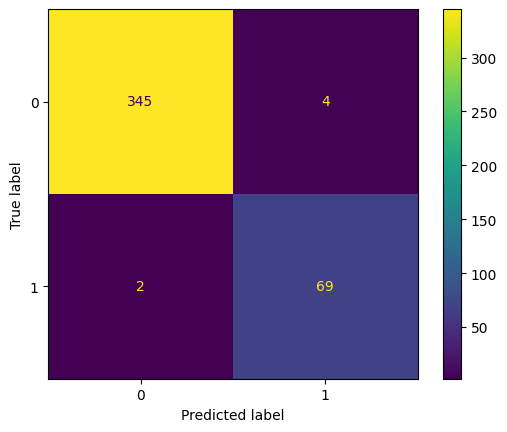

In [70]:
eva_ConfusionMatrixDisplay("VIT 训练集混淆矩阵--许海天", y_valid.cpu().numpy(), val_preds)


VIT 测试集混淆矩阵--许海天



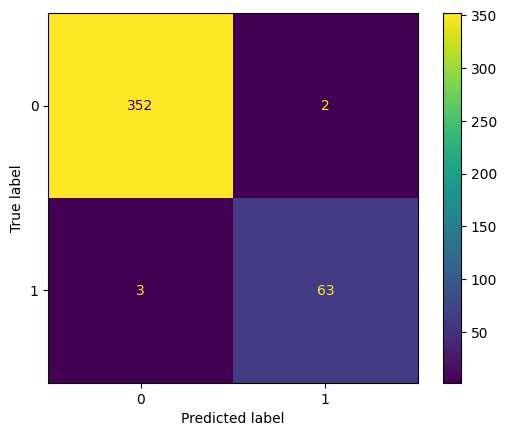

In [71]:
eva_ConfusionMatrixDisplay("VIT 测试集混淆矩阵--许海天", y_test.cpu().numpy(), test_preds)

----VIT roc曲线---许海天----


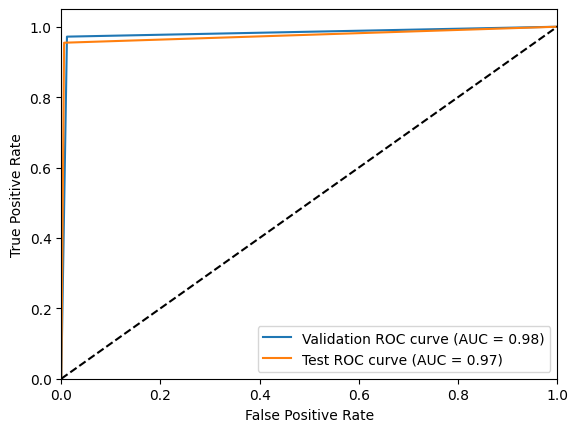

In [72]:
from sklearn.metrics import roc_curve, auc
# 计算ROC曲线的FPR和TPR
fpr_val, tpr_val, _ = roc_curve(y_valid.cpu().numpy(), val_preds)
fpr_test, tpr_test, _ = roc_curve(y_test.cpu().numpy(), test_preds)

# 计算AUC
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # 随机分类器的ROC曲线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('----VIT roc曲线---许海天----')
plt.legend(loc="lower right")
plt.show()

-------许海天部分2结束---------